# Identifying and filling in missing data

In [1]:
import pandas as pd
import numpy as np

In [2]:
titanic_df = pd.read_csv('../DataSets/titanicData.csv')

In [3]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#pd.set_option('display.max_rows', None) # this command will allow you to display the whole data frame
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### Finding missing attribute values for the Age attribute

In [5]:
titanic_df['Age'].isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888     True
889    False
890    False
Name: Age, Length: 891, dtype: bool

### How many values of Age are missing?

In [137]:
sum(titanic_df['Age'].isnull() == True)

177

In [138]:
from scipy import stats

most_freq_age, count = stats.mode(titanic_df['Age'])

age_mode = int(most_freq_age) # which age occurs most frequently in the dataset
print(age_mode)

24


### Create a new column for Age where we will be filling the missing values

In [6]:
# Creating copy for part 2:
titanic_df2 = titanic_df.copy()

titanic_df['Age_repl1'] = titanic_df['Age']

In [106]:
titanic_df['Age_repl1'].replace(np.nan, age_mode, inplace=True)

In [153]:
titanic_df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [108]:
titanic_df['Age_repl1'].describe()

count    891.000000
mean      28.566970
std       13.199572
min        0.420000
25%       22.000000
50%       24.000000
75%       35.000000
max       80.000000
Name: Age_repl1, dtype: float64

# Group In-Class & Homework Assignment with individual submission

## Part 1: Create a table that shows how different replacement strategies affect dataset properties

* Experiment with 5 replacement strategies
* Dataset properties can be described in terms of basic statistics such as mean, median, mode, standard deviation of the Age column 
* Which of the replacement strategies works best in terms of preserving overall dataset properties?

## Part 2: Evaluate subsets of the data to evaluate whether the replacement affects the properties of particular passenger types (e.g., does replacement distort the estimates for some passenger types more than others):
* Identify 2-4 passenger types that you want to look at
* Use your favorite replacement strategy (which performed well in Part 1)
* Investigate whether this strategy affects the passenger types differently
* Summarize your findings

# Part 1:

In [40]:
# Replacement strategy 1: Use the mean age
titanic_df['Age_repl2'] = titanic_df['Age']
age_mean = titanic_df.mean()
titanic_df['Age_repl2'].replace(np.nan, age_mean["Age"], inplace=True)
print(titanic_df['Age_repl2'].describe() - titanic_df['Age'].describe())

count    1.770000e+02
mean    -5.684342e-14
std     -1.524482e+00
min      0.000000e+00
25%      1.875000e+00
50%      1.699118e+00
75%     -3.000000e+00
max      0.000000e+00
dtype: float64


In [41]:
# Replacement strategy 2: Group by sex and get medians per category
titanic_df['Age_repl3'] = titanic_df['Age']
medians = titanic_df.groupby("Sex").median()
titanic_df.loc[ (titanic_df["Sex"] == "male") & (titanic_df["Age_repl3"].isnull()), 'Age_repl3'] = medians["Age"][1]
titanic_df.loc[ (titanic_df["Sex"] == "female") & (titanic_df["Age_repl3"].isnull()), 'Age_repl3'] = medians["Age"][0]
print(titanic_df['Age_repl3'].describe() - titanic_df['Age'].describe())

count    177.000000
mean      -0.257849
std       -1.507750
min        0.000000
25%        1.875000
50%        1.000000
75%       -3.000000
max        0.000000
dtype: float64


In [42]:
# Replacement strategy 3: Group by sex and get means per category
titanic_df['Age_repl4'] = titanic_df['Age']
means = titanic_df.groupby("Sex").mean()
titanic_df.loc[ (titanic_df["Sex"] == "male") & (titanic_df["Age_repl4"].isnull()), 'Age_repl4'] = means["Age"][1]
titanic_df.loc[ (titanic_df["Sex"] == "female") & (titanic_df["Age_repl4"].isnull()), 'Age_repl4'] = means["Age"][0]
print(titanic_df['Age_repl4'].describe() - titanic_df['Age'].describe())

count    177.000000
mean       0.036917
std       -1.511600
min        0.000000
25%        1.875000
50%        2.000000
75%       -3.000000
max        0.000000
dtype: float64


In [43]:
# Replacement strategy 4: Replace with most frequent value in Age column
titanic_df['Age_repl5'] = titanic_df['Age']
age_freq = titanic_df['Age'].value_counts().index[0]
titanic_df['Age_repl5'].replace(np.nan, age_freq, inplace=True)
print(titanic_df['Age_repl5'].describe() - titanic_df['Age'].describe())

count    177.000000
mean      -1.132148
std       -1.326926
min        0.000000
25%        1.875000
50%       -4.000000
75%       -3.000000
max        0.000000
dtype: float64


In [44]:
# Replacement strategy 5: Replace with constant value
# Note that we can play with actual constant value and compare to original age info until similarity is reached (if any)
titanic_df['Age_repl6'] = titanic_df['Age']
titanic_df['Age_repl6'].replace(np.nan, 28, inplace=True)
print(titanic_df['Age_repl6'].describe() - titanic_df['Age'].describe())

count    177.000000
mean      -0.337535
std       -1.506801
min        0.000000
25%        1.875000
50%        0.000000
75%       -3.000000
max        0.000000
dtype: float64


In [45]:
# Final table of all

part_1_dict = {"Original Age Info": titanic_df['Age'].describe(), "Mean Age": titanic_df['Age_repl2'].describe(),
              "Median per Sex": titanic_df['Age_repl3'].describe(), "Mean per Sex": titanic_df['Age_repl4'].describe(),
              "Most Frequent Age": titanic_df['Age_repl5'].describe(), "Constant Value": titanic_df['Age_repl6'].describe()}
part1_df = pd.DataFrame(data=part_1_dict)
part1_df

,Original Age Info,Mean Age,Median per Sex,Mean per Sex,Most Frequent Age,Constant Value
count,714.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,29.699118,29.699118,29.441268,29.736034,28.566970,29.361582
std,14.526497,13.002015,13.018747,13.014897,13.199572,13.019697
min,0.420000,0.420000,0.420000,0.420000,0.420000,0.420000
25%,20.125000,22.000000,22.000000,22.000000,22.000000,22.000000
50%,28.000000,29.699118,29.000000,30.000000,24.000000,28.000000
75%,38.000000,35.000000,35.000000,35.000000,35.000000,35.000000
max,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000


## Which strategy performs best?
When compared to original Age column, both the median and mean of individual sexes yield good results. I will use the mean strategy for part 2

# Part 2:

Average age:  28.343689655172415 
 Average fare:  34.69451400560218 
 Most common Pclass:  3.0


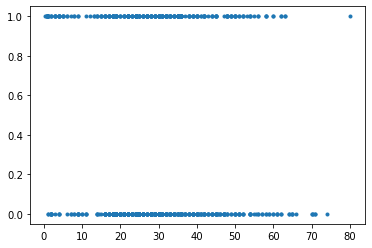

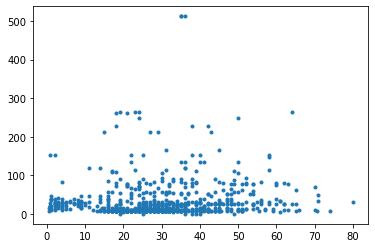

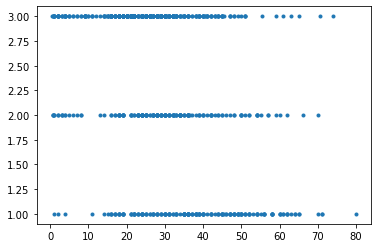

In [46]:
# Passenger types I will focus on are Survival, Pclass, and Fare with respect to Age:

# Getting the average age of those that survived
average_survival_age = titanic_df2.dropna(subset=["Age"]).groupby("Survived").mean()["Age"][1]

# Getting the average Fare price of those that have an Age indicated
average_fare_price = titanic_df2.dropna(subset=["Age"]).mean()[6]

# Getting the Mode Pclass of those that have an Age indicated
mode_pclass = titanic_df2.dropna(subset=["Age"]).mode()["Pclass"][0]
print("Average age: ",average_survival_age,"\n", "Average fare: ",average_fare_price,"\n","Most common Pclass: ",mode_pclass)

# Also, plotting each column against Age. Dropping rows with no Age so that can get accurate representation pre-imputation
import matplotlib.pyplot as plt
plt.figure()
x = titanic_df2.dropna(subset=["Age"])["Age"]
y1 = titanic_df2.dropna(subset=["Age"])["Survived"]
y2 = titanic_df.dropna(subset=["Age"])["Fare"]
y3 = titanic_df.dropna(subset=["Age"])["Pclass"]
plt.plot(x,y1, '.')
plt.show()
plt.plot(x,y2, '.')
plt.show()
plt.plot(x,y3, '.')
plt.show()

In [47]:
# Using Mean of each Sex strategy:
titanic_df2['Replaced_Age'] = titanic_df2['Age']
means = titanic_df2.groupby("Sex").mean()
titanic_df2.loc[ (titanic_df2["Sex"] == "male") & (titanic_df2["Replaced_Age"].isnull()), 'Replaced_Age'] = means["Age"][1]
titanic_df2.loc[ (titanic_df2["Sex"] == "female") & (titanic_df2["Replaced_Age"].isnull()), 'Replaced_Age'] = means["Age"][0]

Average age:  28.410122312009246 
 Average fare:  32.2042079685746 
 Most common Pclass:  3.0


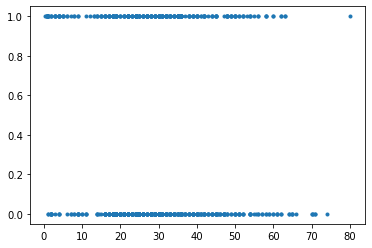

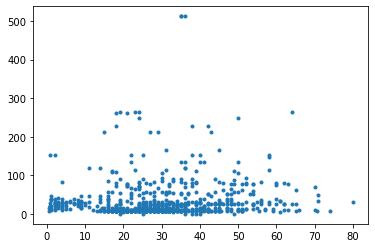

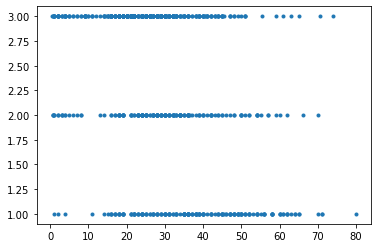

In [48]:
# Getting the averages again but with the replacement age included
new_average_survival_age = titanic_df2.groupby("Survived").mean()["Replaced_Age"][1]
new_average_fare_price = titanic_df2.mean()[6]
new_mode_pclass = titanic_df2.mode()["Pclass"][0]

print("Average age: ",new_average_survival_age,"\n", "Average fare: ",
      new_average_fare_price,"\n","Most common Pclass: ",new_mode_pclass)

# And plotting the graphs again with new Age data included
plt.figure()
x = titanic_df2["Age"]
y21 = titanic_df2["Survived"]
y22 = titanic_df["Fare"]
y23 = titanic_df["Pclass"]
plt.plot(x,y21, '.')
plt.show()
plt.plot(x,y22, '.')
plt.show()
plt.plot(x,y23, '.')
plt.show()

## Findings
The average age of survival is minimally affected by introducing a replacement age. The same goes for the Mode Pclass on the ship. The average fare price is affected a little more, however. I would say that passenger types with larger variations in data values are more heavily affected when including an imputed value.

# Submission Instructions

Individual submission for the Missing Data Assignment on Canvas.